<h1>Introdução_Geopandas</h1>
<p>Olá, aqui lhes apresento o primeiro escopo e a introdução ao meu projeto, que tem como base os mapas do <strong>estado de São Paulo</strong> e dados de roubo de seus municípios. O objetivo é unir esses dados, criando <strong>mapas interativos</strong>, com foco principal na capital do estado. Nesta seção, serão apresentadas as ferramentas, suas utilidades e onde e como serão aplicadas.</p>

<h2>1.instalado as bibliotecas</h2> 
</P>Geopandas : para facilitar a manipulação de dados geoespaciais e  Matplotlib: para criar visualizações gráficas a partir desses dados.</p>

In [1]:
# !pip install geopandas
# !pip install matplotlib
# !pip list matplotlib


Documentação masplotlib https://matplotlib.org/stable/users/index.html

In [2]:
#imports
import geopandas as gpd
import matplotlib.pyplot  as plt

<h2>2.Baixando dados Espaciais</h2>
<p>Usarei como exemplo municipios do estado de São Paulo como base.</p>
<p>A fonte de dados sera do site do IBGE <a href="https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html" target="_blank">https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html  </a> </p>

<h2>3.Lendo arquivos</h2>
<p>Após o download, foi criada a pasta "dados", onde os arquivos foram descompactados para carregá-los e iniciar as análises.</p>
<p>Com o Geopandas, é possível ler vários formatos, como <span style="color: blue;">Shapefile, GeoJSON, KML, GPKG, entre outros</span>,</br> usando a função gpd.read_file().</p>


In [3]:
#ler os dados do diretorio 
data= gpd.read_file('dados/SP_Municipios_2022.shp')


In [4]:
type (data)

geopandas.geodataframe.GeoDataFrame

O Geodataframe é uma variável que herda as funcionalidades do Pandas.DataFrame, agregando operações para dados espaciais.
Ele segue uma abordagem similar ao Pandas, por isso o nome Geopandas, mas é voltado para análises espaciais e de estruturas
geométricas.

Abaixo usarei a função head() para podermos verificar os dados no casa nesse exemplo as 5 primeiras.

In [5]:
data.head(5)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


<h2>4.Visulaizando os Dados</h2>
<p>aqui  instalaleri a bliblioteca descartes  que é útil para plotar figuras geométricas em mapas com o auxílio do matplotlib. 
e em seguida a função .plot() é uma função do matplotlib utilizada para criar gráficos com base nos dados fornecidos.

instalar com : !pip install descartes<h2>


<Axes: >

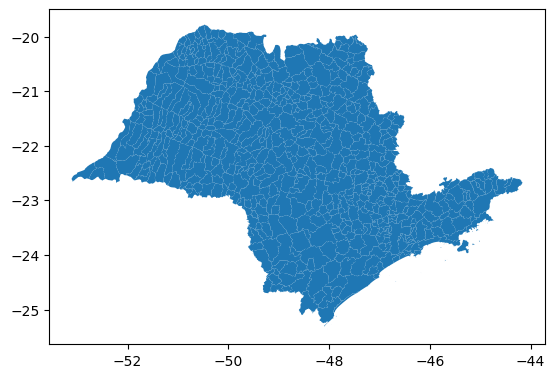

In [6]:
data.plot()

pode-se fazer alterações veja abaixo o comando utilizado para modificar o estilo e melhorar a vizualização da figura

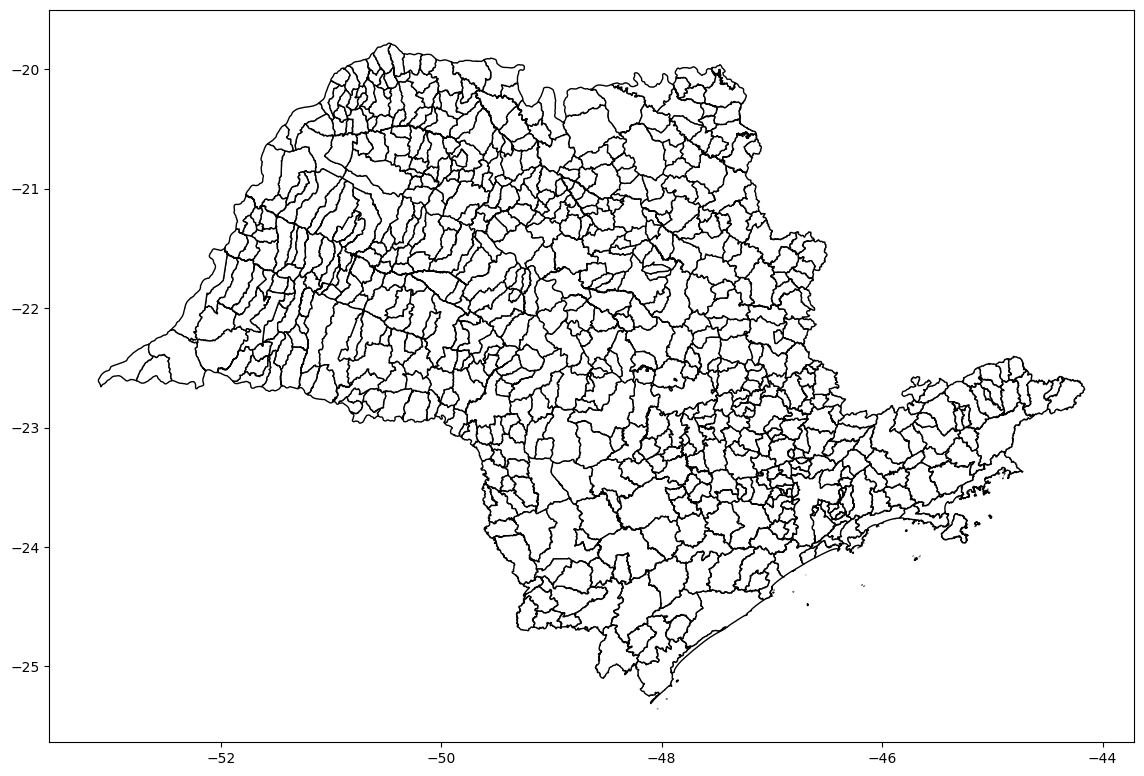

In [7]:
data.plot(figsize=(14, 10), facecolor='#ffffff', edgecolor='#000000')
plt.show()


<h2>5. Salvando os Dados</h2>
<p>Como o Geodataframe herda as funções do pandas, podemos utilizar as informações dos dados salvos para filtrar determinada
região.</p>

In [8]:
#filtrar somente a capital de São Paulo
gdf_SP = data[data['NM_MUN'] .str.contains('São Paulo', case=False)]
gdf_SP

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.63512 -23.83850, -46.63455 -23.8..."


<Axes: >

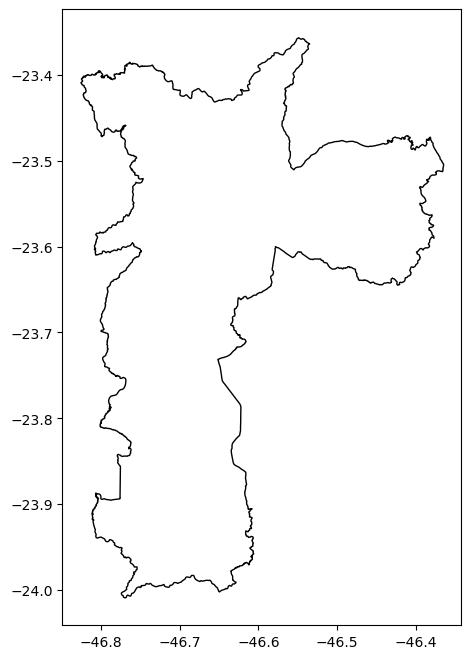

In [9]:
gdf_SP.plot(figsize=(8, 8), facecolor='#ffffff', edgecolor='#000000')


<P>Para salvar os dados gerados do município filtrado, podemos utilizar a função <i>to_file()</i>.</P>

<p>Para salvar arquivos, o GeoPandas usa o formato Shapefile (.shp) por padrão, mas também podemos usar outros formatos especificando o arquivo como parâmetro "driver". No exemplo abaixo, será salvo em formato GeoJSON</p>


In [10]:
#salvando o geoframe com formato geojson
filename ="dados/Sao_Paulo_capital.json"

gdf_SP.to_file('dados/Sao_Paulo_capital.json', driver = 'GeoJSON')

Ler o arquivo de dados criado acima.

In [11]:
gdf_SP = gpd.read_file(filename , driver='GeoJSON')
gdf_SP

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.63512 -23.83850, -46.63455 -23.8..."
